In [6]:
import pandas as pd
data = pd.read_csv("veriler.csv")
data.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [8]:
c = data.iloc[:,-1:].values
print(c)

[['e']
 ['e']
 ['k']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['e']
 ['e']
 ['e']
 ['k']
 ['k']
 ['k']]


In [9]:
from sklearn import preprocessing 
ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()
print(c)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [17]:
sonuc3 = pd.DataFrame(data=c[:,1:],index=range(len(c)),columns=["cinsiyet"])

In [22]:
data.drop("cinsiyet",axis=1,inplace=True)

In [25]:
data1 = pd.concat([data,sonuc3],axis="columns")

In [26]:
data1

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,0.0
1,tr,125,36,11,0.0
2,tr,135,34,10,1.0
3,tr,133,30,9,1.0
4,tr,129,38,12,0.0
5,tr,180,90,30,0.0
6,tr,190,80,25,0.0
7,tr,175,90,35,0.0
8,tr,177,60,22,1.0
9,us,185,105,33,0.0


In [56]:
cou = data.iloc[:,:1]
ohen = preprocessing.OneHotEncoder()
coun = ohen.fit_transform(cou).toarray()
coun1 = pd.DataFrame(data=coun,index=range(22),columns=["fr","tr","us"])
data2 = pd.concat([coun1,data1],axis=1)
data2.drop("ulke",axis=1,inplace=True)
data2

,fr,tr,us,boy,kilo,yas,cinsiyet
0,0.0,1.0,0.0,130,30,10,0.0
1,0.0,1.0,0.0,125,36,11,0.0
2,0.0,1.0,0.0,135,34,10,1.0
3,0.0,1.0,0.0,133,30,9,1.0
4,0.0,1.0,0.0,129,38,12,0.0
5,0.0,1.0,0.0,180,90,30,0.0
6,0.0,1.0,0.0,190,80,25,0.0
7,0.0,1.0,0.0,175,90,35,0.0
8,0.0,1.0,0.0,177,60,22,1.0
9,0.0,0.0,1.0,185,105,33,0.0


In [57]:
from sklearn.model_selection import train_test_split
x = data2.iloc[:,:-1]
y = data2.iloc[:,-1:]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
mod = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([[ 0.75045671],
       [ 1.00175526],
       [ 0.51235197],
       [ 0.56038654],
       [ 0.5797678 ],
       [-0.15793677],
       [ 0.43014608],
       [ 1.20889606]])

In [66]:
boy = data2.iloc[:,3:4].values

In [69]:
left = data2.iloc[:,:3]
right = data2.iloc[:,4:]
data4 = pd.concat([left,right],axis=1)
data4

,fr,tr,us,kilo,yas,cinsiyet
0,0.0,1.0,0.0,30,10,0.0
1,0.0,1.0,0.0,36,11,0.0
2,0.0,1.0,0.0,34,10,1.0
3,0.0,1.0,0.0,30,9,1.0
4,0.0,1.0,0.0,38,12,0.0
5,0.0,1.0,0.0,90,30,0.0
6,0.0,1.0,0.0,80,25,0.0
7,0.0,1.0,0.0,90,35,0.0
8,0.0,1.0,0.0,60,22,1.0
9,0.0,0.0,1.0,105,33,0.0


In [75]:
x_train,x_test,y_train,y_test = train_test_split(data4,boy,test_size=0.33,random_state=42)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.8429709635777713

## Python ile Geri Eleme(Backward Elimination)

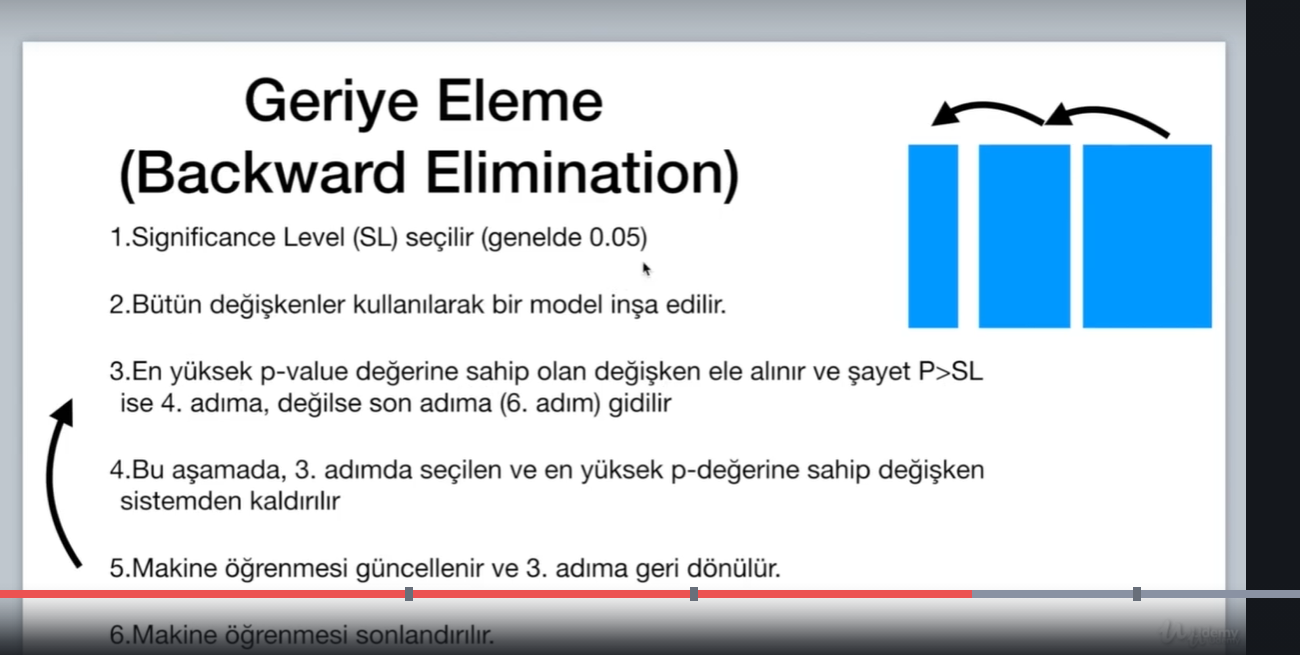

In [109]:
from IPython.display import Image
Image("2.PNG")

In [106]:
from statsmodels import api as sm
import numpy as np
X = np.append(arr = np.ones((22,1)).astype(int),values=data4,axis=1)
X_l = data4.iloc[:,[0,1,2,3,4,5]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     24.69
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           5.41e-07
Time:                        17:54:06   Log-Likelihood:                -73.950
No. Observations:                  22   AIC:                             159.9
Df Residuals:                      16   BIC:                             166.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           103.4708      9.878     10.475      0.0

In [112]:
# x5 i elememiz gerekiyor çünkü en yüksek değer onda p value değeri olarak
X = np.append(arr = np.ones((22,1)).astype(int),values=data4,axis=1)
X_l = data4.iloc[:,[0,1,2,3,5]].values
X_l = np.array(X_l,dtype=float)
model = sm.OLS(boy,X_l).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     32.47
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           9.32e-08
Time:                        17:59:23   Log-Likelihood:                -74.043
No. Observations:                  22   AIC:                             158.1
Df Residuals:                      17   BIC:                             163.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           104.5490      9.193     11.373      0.0